[Датасет](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset) для классификации учащихся по успеваемости по косвенным признакам.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
from impementation import *

In [2]:
def show_results(train_y, test_y, predict_train, predict_test):
    print(f"accuracy score - train: {accuracy_score(train_y, predict_train)}")
    print(f"accuracy score - test: {accuracy_score(test_y, predict_test)}")

    print(f"f1 score - train: {f1_score(train_y, predict_train, average='macro')}")
    print(f"f1 score - tets: {f1_score(test_y, predict_test, average='micro')}")

    cm = confusion_matrix(test_y, predict_test)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm = cm / cm_sum.astype(float)
    sns.heatmap(cm, annot=True, fmt=".1%", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix (test)")
    plt.show()

In [3]:
dataset = pd.read_csv("dataset_classification.csv")
dataset.info()  # можно заметить, что все фичи числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [4]:
X = dataset.drop(columns=["StudentID", "GradeClass"])
y = dataset["GradeClass"].values.astype(float)

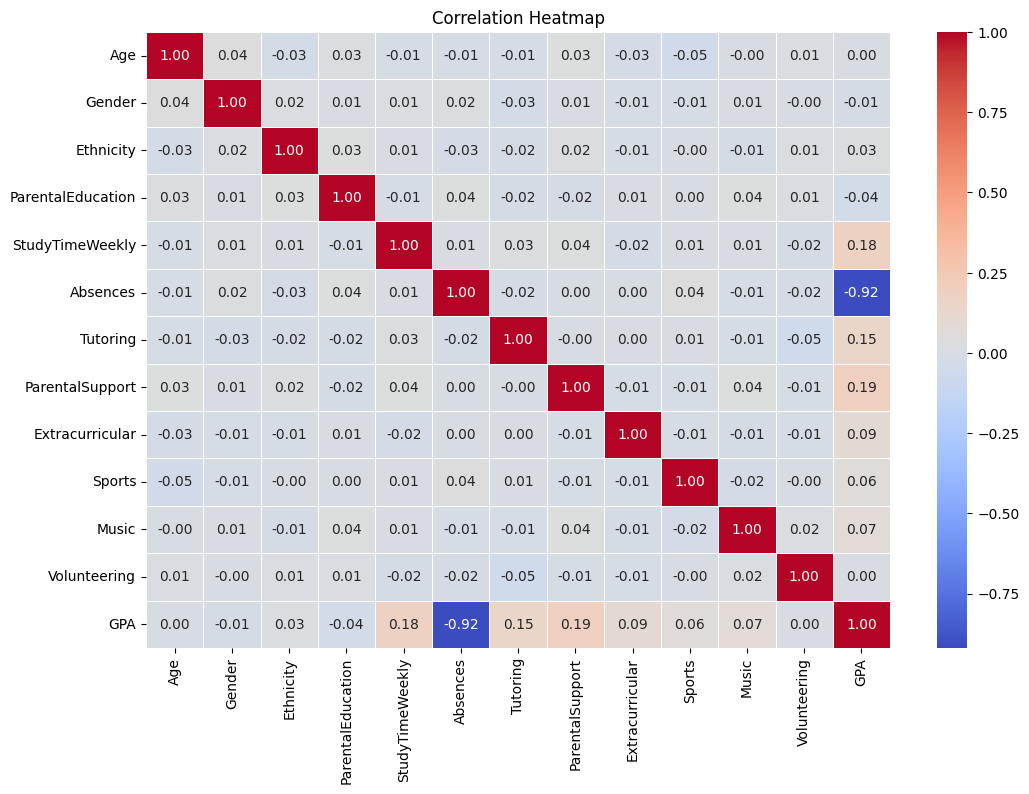

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

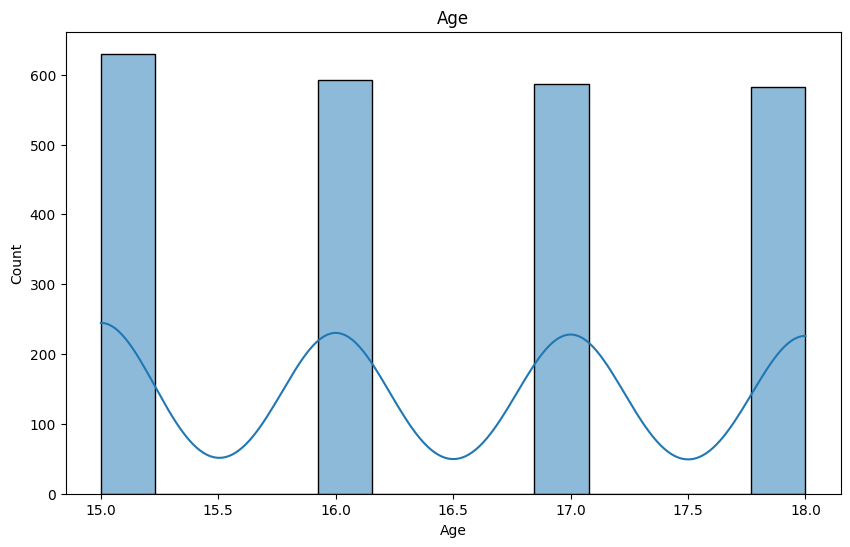

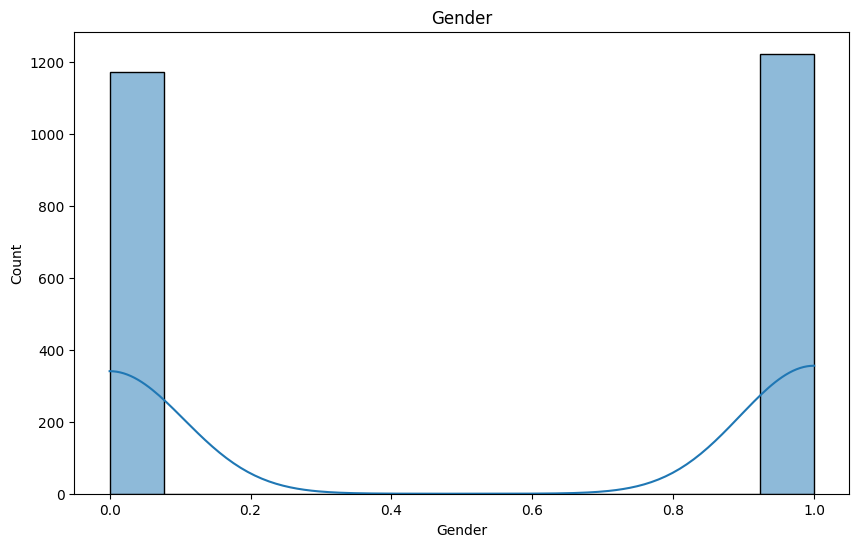

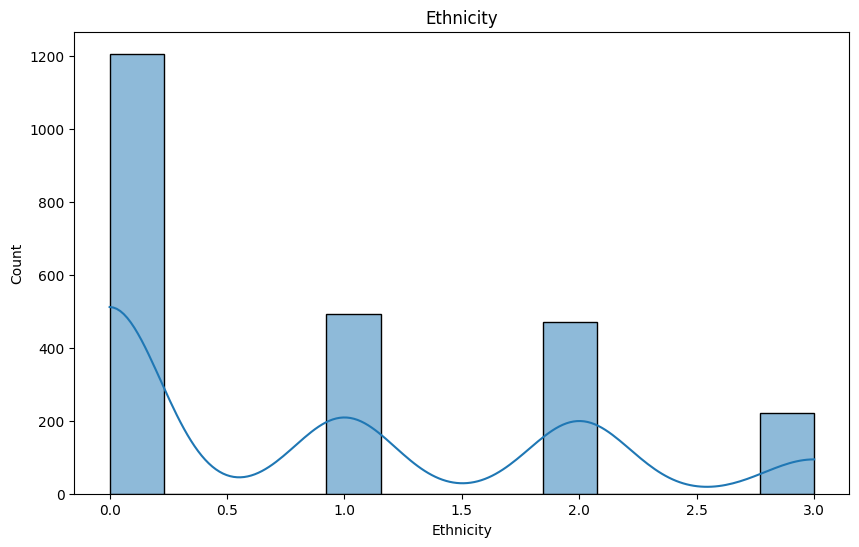

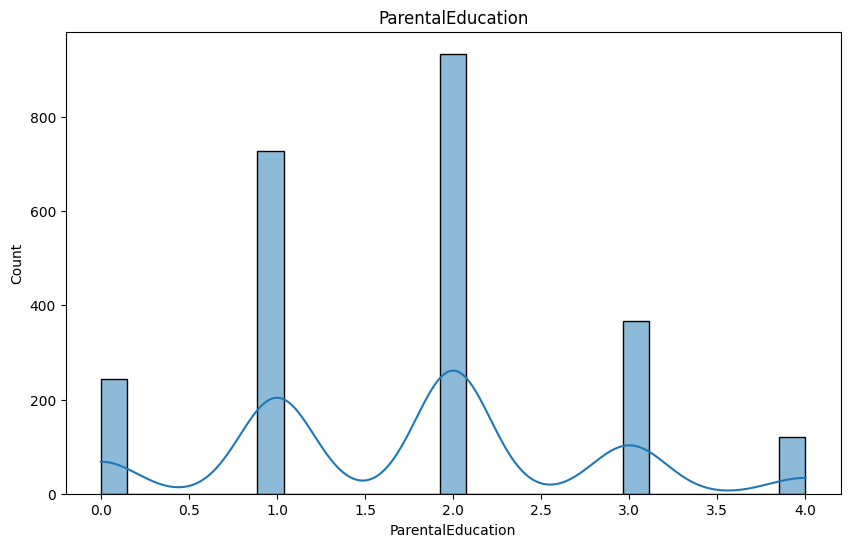

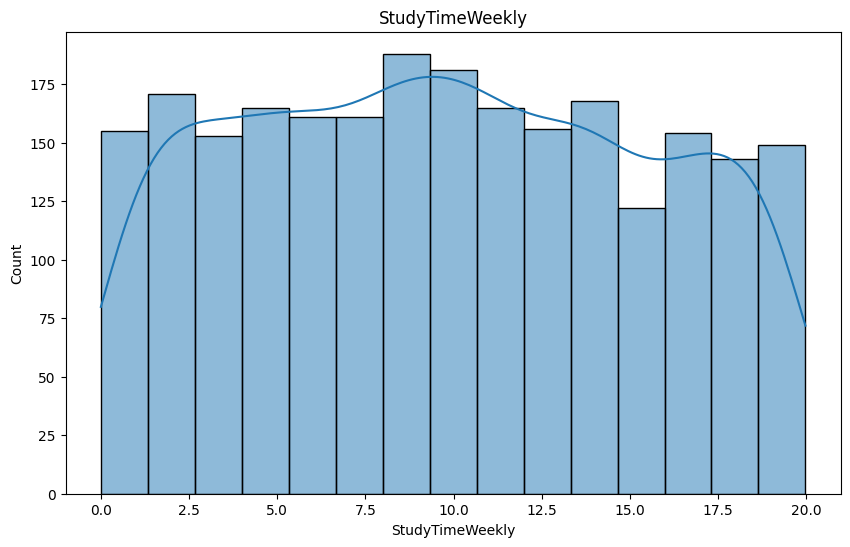

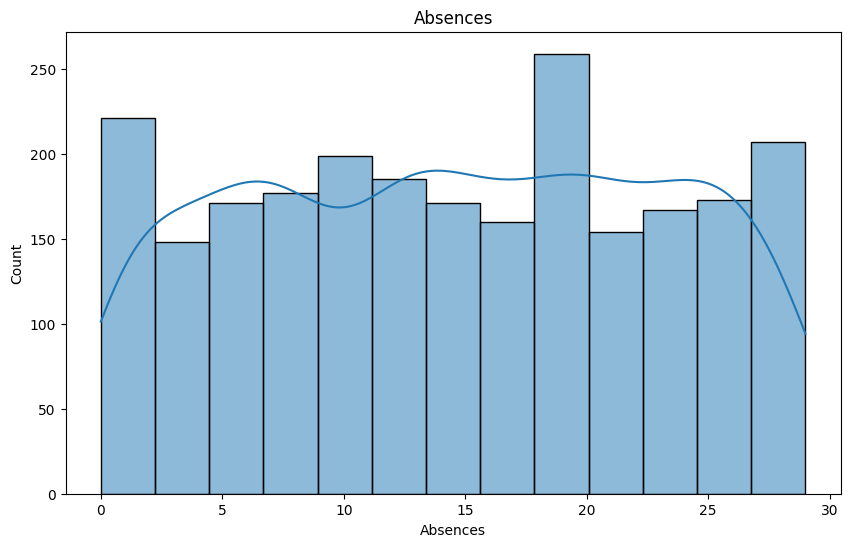

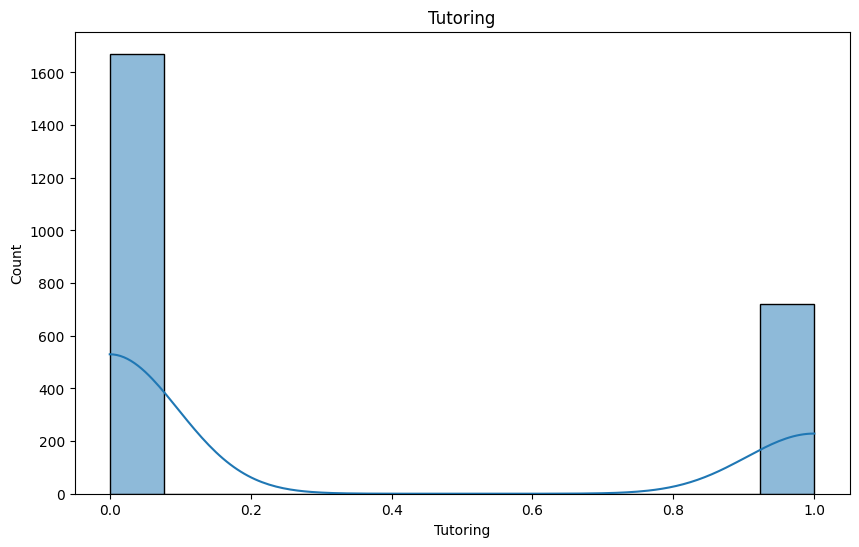

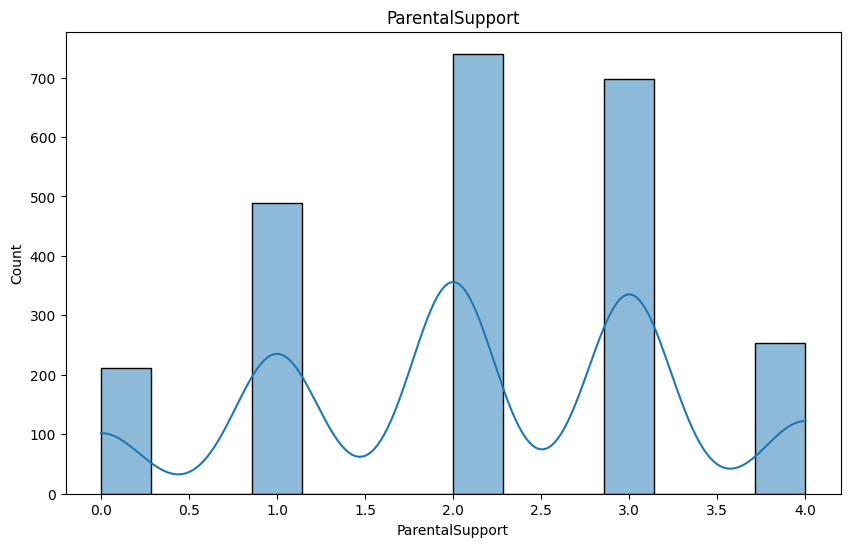

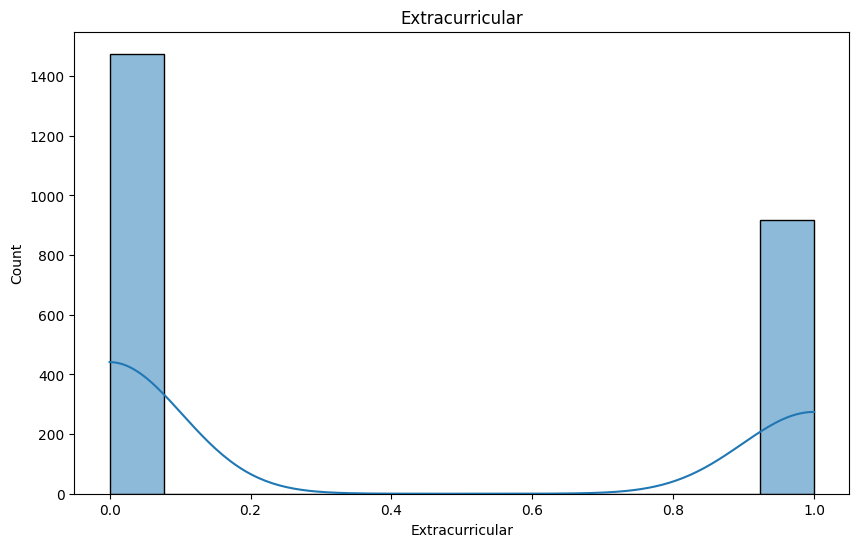

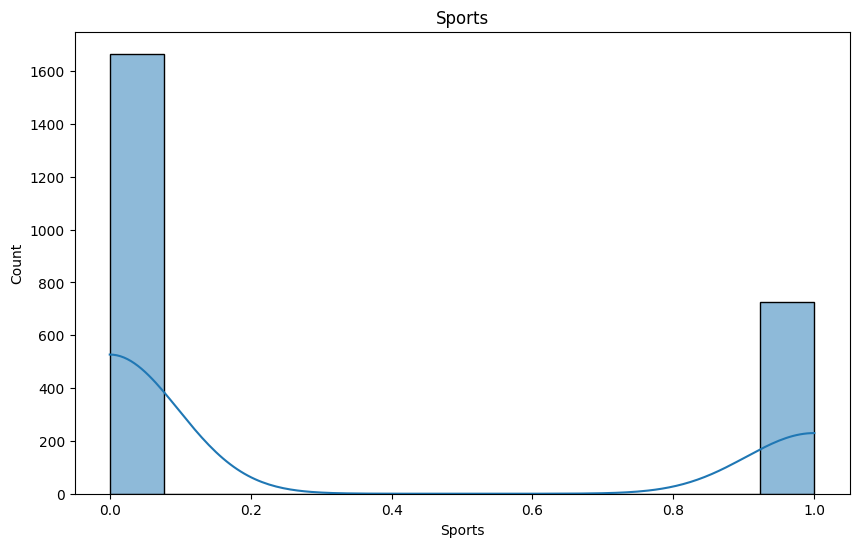

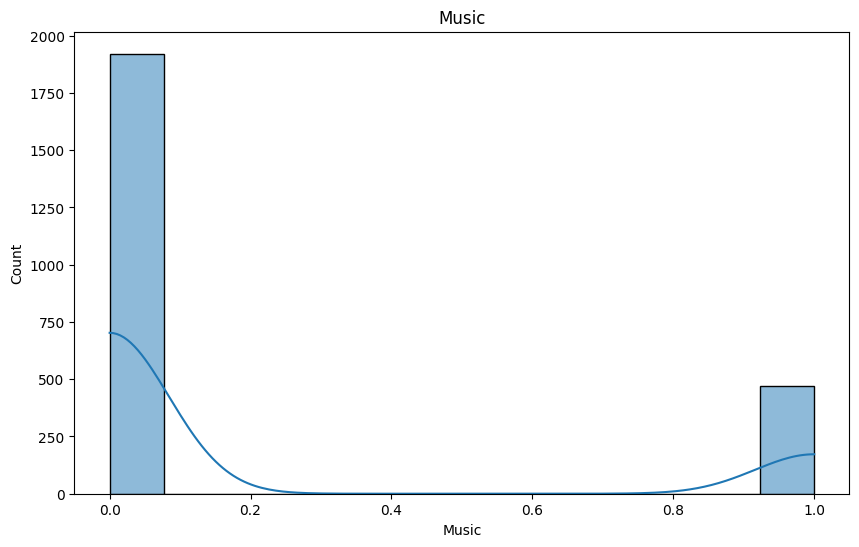

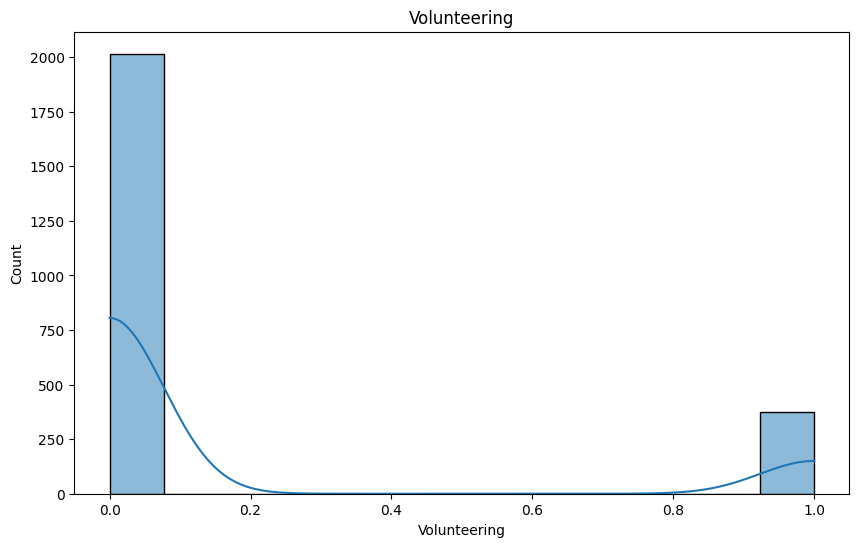

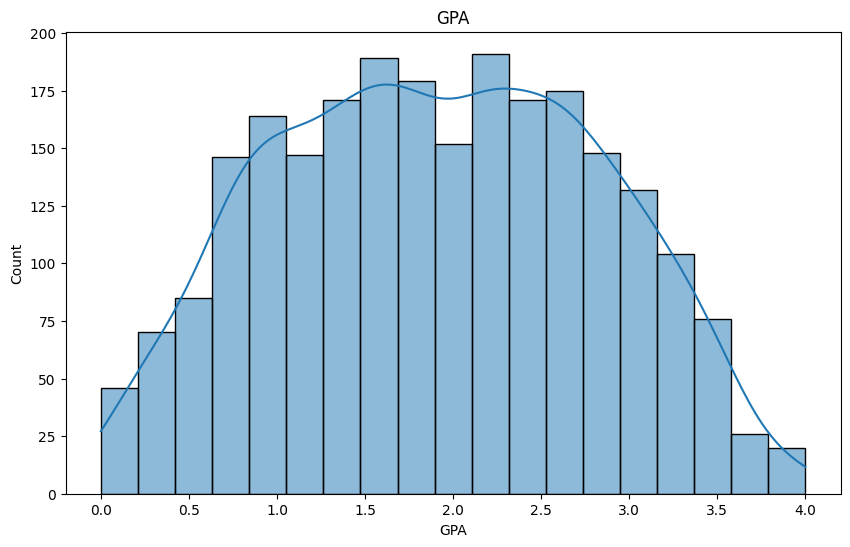

In [6]:
for col in X.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset[col], kde=True)
    plt.title(f"{col}")
    plt.show()

Стандартизируем фичи и разделим датасет

In [7]:
prepared_X = StandardScaler().fit_transform(X)
train_X, test_X, train_y, test_y = train_test_split(prepared_X, y, test_size=0.2, random_state=0)

## Sklearn

In [8]:
def pipline_sklearn(classifiers, params):
    n = len(classifiers)
    for i in range(n):
        classifier = classifiers[i]
        print(f"{classifier.__name__} default")
        model = classifier()
        model.fit(train_X, train_y)
        predict_train = model.predict(train_X)
        predict_test = model.predict(test_X)
        show_results(train_y, test_y, predict_train, predict_test)

        print(f"{classifier.__name__} optimized")
        model = classifier()
        clf = GridSearchCV(model, params[i], cv=3, scoring="accuracy", return_train_score=False, n_jobs=-1, verbose=1)
        clf.fit(train_X, train_y)
        best_model = clf.best_estimator_
        predict_train = best_model.predict(train_X)
        predict_test = best_model.predict(test_X)
        show_results(train_y, test_y, predict_train, predict_test)
        print("\n\n")

KNeighborsClassifier default
accuracy score - train: 0.7621536853110298
accuracy score - test: 0.6096033402922756
f1 score - train: 0.6407055733865865
f1 score - tets: 0.6096033402922756


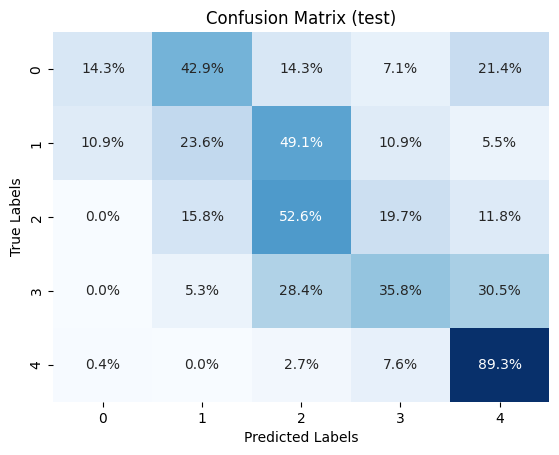

KNeighborsClassifier optimized
Fitting 3 folds for each of 72 candidates, totalling 216 fits
accuracy score - train: 1.0
accuracy score - test: 0.6889352818371608
f1 score - train: 1.0
f1 score - tets: 0.6889352818371608


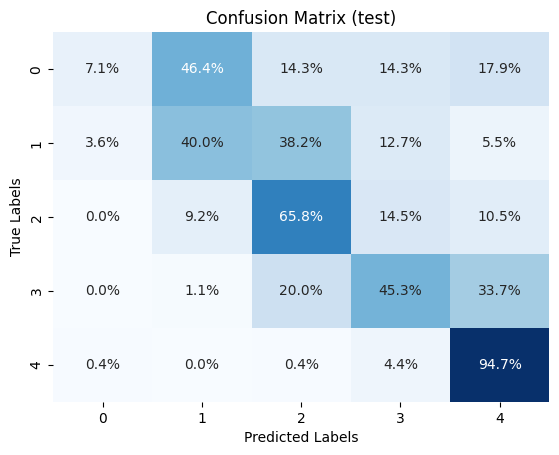




LogisticRegression default
accuracy score - train: 0.8149503397804495
accuracy score - test: 0.7766179540709812
f1 score - train: 0.6348877871452341
f1 score - tets: 0.7766179540709812


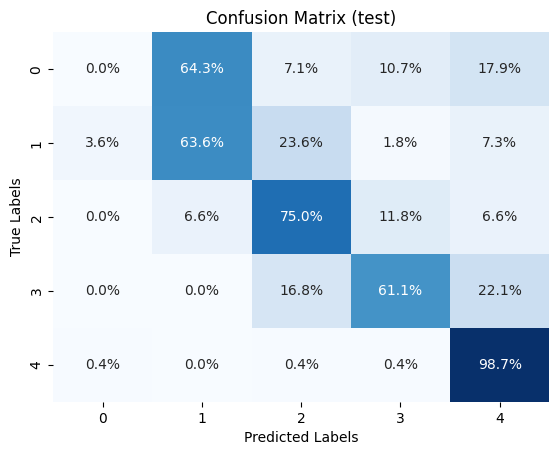

LogisticRegression optimized
Fitting 3 folds for each of 12 candidates, totalling 36 fits
accuracy score - train: 0.8222686879247255
accuracy score - test: 0.7870563674321504
f1 score - train: 0.6451404809272054
f1 score - tets: 0.7870563674321504


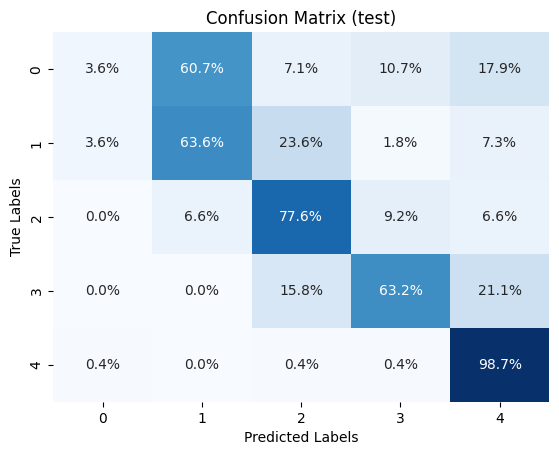




DecisionTreeClassifier default
accuracy score - train: 1.0
accuracy score - test: 0.8329853862212944
f1 score - train: 1.0
f1 score - tets: 0.8329853862212944


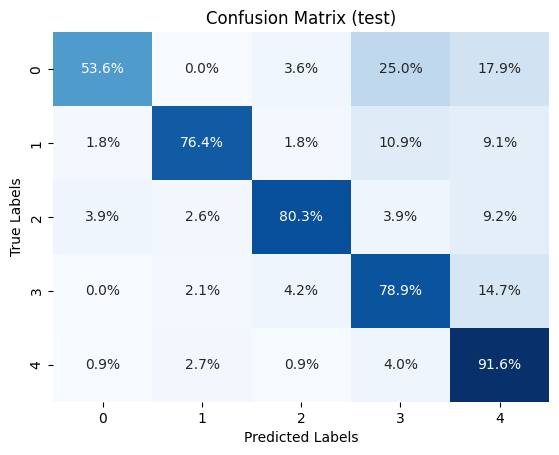

DecisionTreeClassifier optimized
Fitting 3 folds for each of 72 candidates, totalling 216 fits
accuracy score - train: 0.9330893883951908
accuracy score - test: 0.918580375782881
f1 score - train: 0.8926333882768971
f1 score - tets: 0.918580375782881


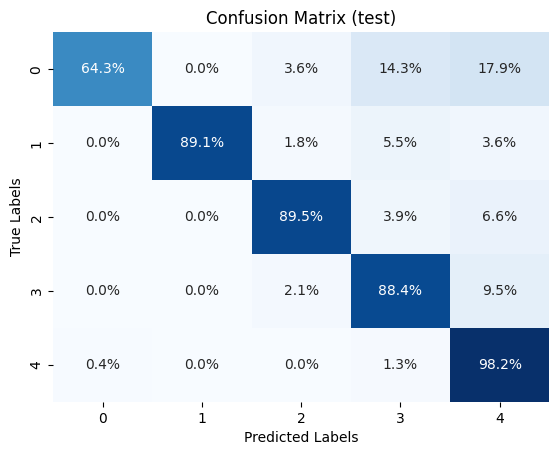




RandomForestClassifier default
accuracy score - train: 1.0
accuracy score - test: 0.9081419624217119
f1 score - train: 1.0
f1 score - tets: 0.9081419624217119


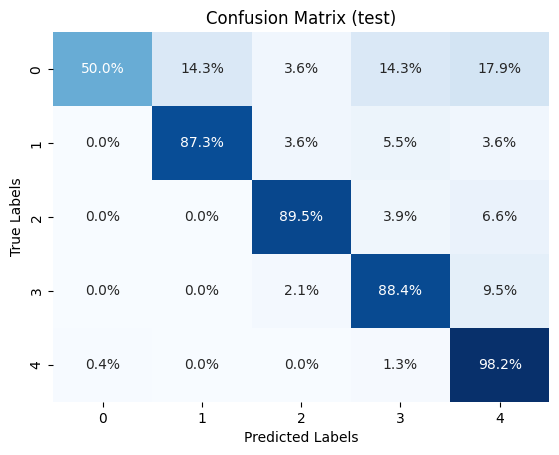

RandomForestClassifier optimized
Fitting 3 folds for each of 324 candidates, totalling 972 fits
accuracy score - train: 0.9639309984317825
accuracy score - test: 0.906054279749478
f1 score - train: 0.9459029943346353
f1 score - tets: 0.906054279749478


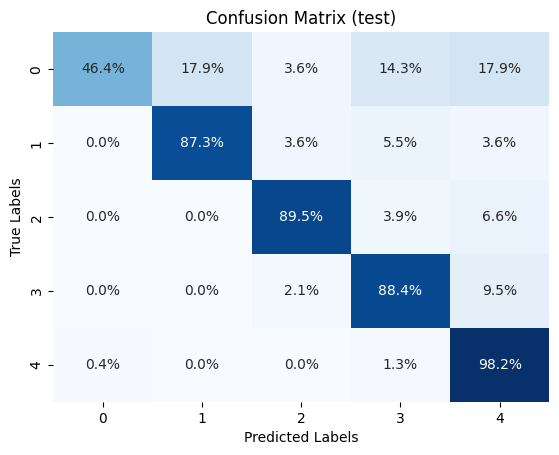




GradientBoostingClassifier default
accuracy score - train: 0.9686356508102457
accuracy score - test: 0.9081419624217119
f1 score - train: 0.9605161771935762
f1 score - tets: 0.9081419624217119


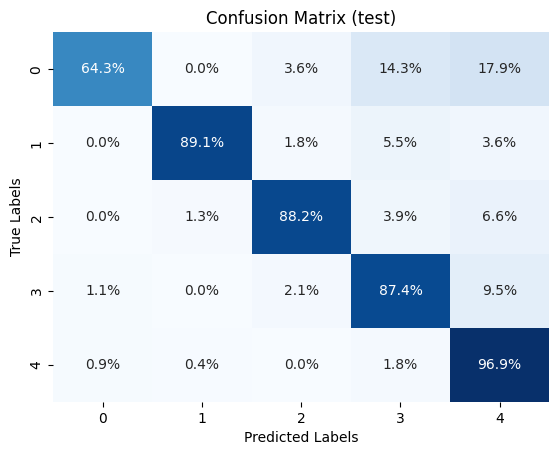

GradientBoostingClassifier optimized
Fitting 3 folds for each of 64 candidates, totalling 192 fits
accuracy score - train: 0.9330893883951908
accuracy score - test: 0.918580375782881
f1 score - train: 0.8926333882768971
f1 score - tets: 0.918580375782881


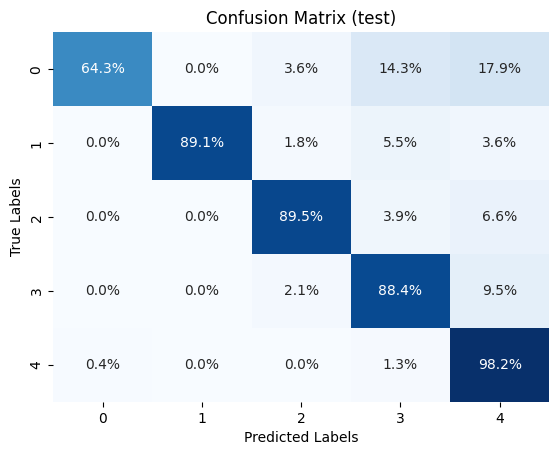

In [9]:
classifiers = [KNeighborsClassifier, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier]
params = [
    {
        "n_neighbors": [3, 5, 7, 9], 
        "algorithm" : ["ball_tree", "kd_tree", "brute"],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    },
    {
        "penalty": ["l1", "l2"],
        "C": [0.01, 0.1, 1],
        "solver": ["liblinear", "saga"]
    },
    {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False]
    },
    {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "subsample": [0.8, 1.0]
    }
]

pipline_sklearn(classifiers, params)

## Implementation

In [10]:
def pipeline_implementation(models):
  for model in models:
      print(f"{model.__class__.__name__} implemented")
      model.fit(train_X, train_y)
      predict_train = model.predict(train_X)
      predict_test = model.predict(test_X)
      show_results(train_y, test_y, predict_train, predict_test)
      print("\n\n")

KNN implemented
accuracy score - train: 0.7652901202300052
accuracy score - test: 0.6221294363256785
f1 score - train: 0.6543475244124585
f1 score - tets: 0.6221294363256785


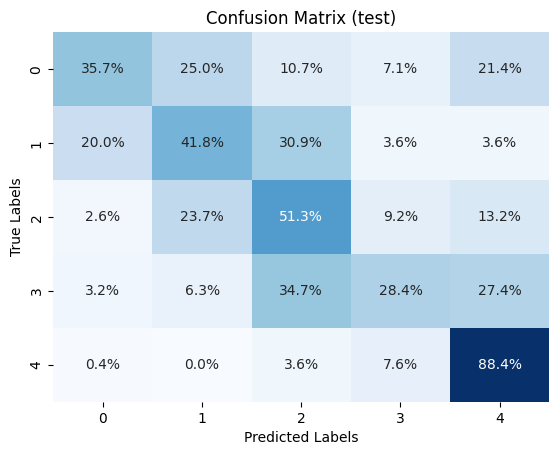




LogRegression implemented
accuracy score - train: 0.7051751176163095
accuracy score - test: 0.6409185803757829
f1 score - train: 0.45325503867790023
f1 score - tets: 0.6409185803757829


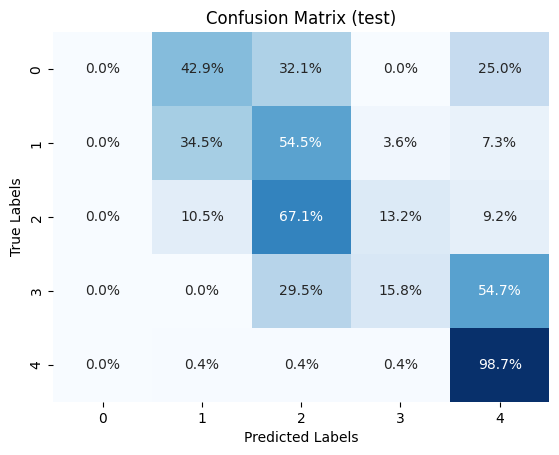




DecisionTree implemented
accuracy score - train: 0.9367485624673288
accuracy score - test: 0.9123173277661796
f1 score - train: 0.8995246889872369
f1 score - tets: 0.9123173277661796


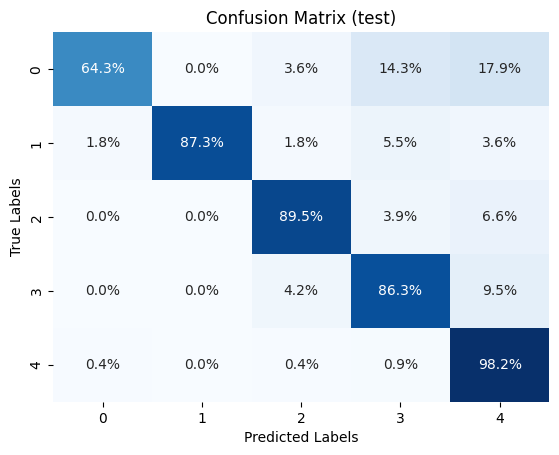




RandomForest implemented
accuracy score - train: 0.9330893883951908
accuracy score - test: 0.9144050104384134
f1 score - train: 0.892630293418404
f1 score - tets: 0.9144050104384134


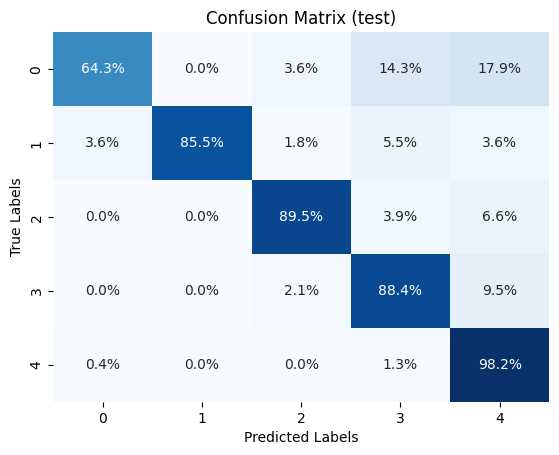




GradientBoosting implemented
accuracy score - train: 0.9283847360167277
accuracy score - test: 0.8977035490605428
f1 score - train: 0.8891029712053976
f1 score - tets: 0.8977035490605428


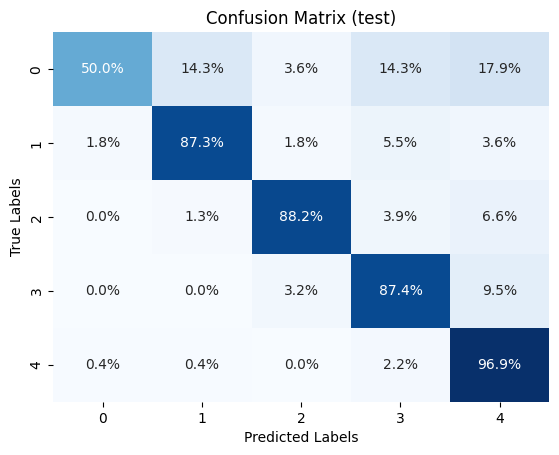

In [11]:
knn = KNN(k=5, task="classification")
logreg = LogRegression(lr=0.15, n_iters=3000, task="classification")
decision_tree = DecisionTree(max_depth=5, task="classification")
random_forest = RandomForest(n_trees=10, max_depth=5, task="classification")
gradient_boosting = GradientBoosting(n_estimators=50, learning_rate=0.1, max_depth=3, task="classification")

models = [knn, logreg, decision_tree, random_forest, gradient_boosting]
pipeline_implementation(models)